<a href="https://colab.research.google.com/github/Shreya1317/The_Sparks_Foundation_TASK2/blob/main/The_Sparks_Foundation_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AUTHOR- SHREYA SAM**

**GRIP @ The Sparks Foundation : Data Science &Business Analytics Internship**

**Task#2 - Prediction using Unsupervised ML**

**#GRIPFEB22**

**Objective:** From the given "Iris" dataset, we have to predict the optimum number of clusters and rerpresent it visually.

**Importing the required libraries**

In [1]:
# Importing the libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

**Loading Iris dataset**

In [5]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**We can check some properties of the given dataset and if there exists any missing values in the same.**

In [8]:
print('statistical properties of the dataset:')
iris_df.describe()

statistical properties of the dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
print('number of rows and columns in the data')
iris_df.shape

number of rows and columns in the data


(150, 4)

In [11]:
print('Column names of the dataset')
iris_df.columns

Column names of the dataset


Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [10]:
print('Checking the existence of missing or null values')
iris_df.isnull().sum()

Checking the existence of missing or null values


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

**Data Visualisation**

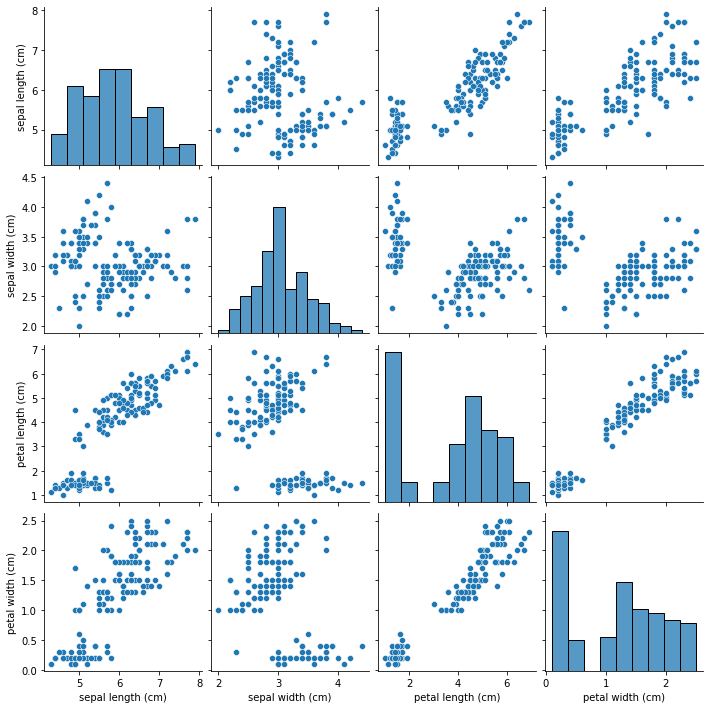

In [6]:
sns.pairplot(iris_df)

**Finding the optimum number of clusters for K Means and determining the value of K**

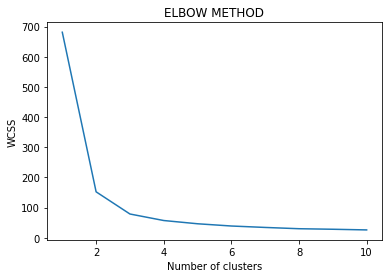

In [14]:
# Finding the optimum number of clusters for k-means classification

x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('ELBOW METHOD')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

Hence, we can clearly see why it is called 'The elbow method'. From the above graph, the optimum clusters is where the elbow occurs i.e., the curve changes it curvature. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

**As elbow is formed at K = 3, therefore the number of clusters is K = '3'**

**Training K-Means Classifier on Dataset**

In [15]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

Visualising the training set results

In [16]:
y_kmeans  

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)


**Visualising number of clusters in graph**

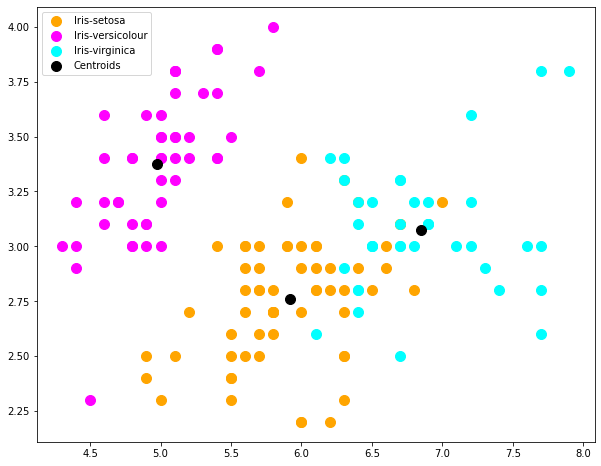

In [ ]:
# Visualising the clusters - On the first two columns
fig = plt.figure(figsize=(10, 8))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'orange', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'magenta', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'cyan', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()

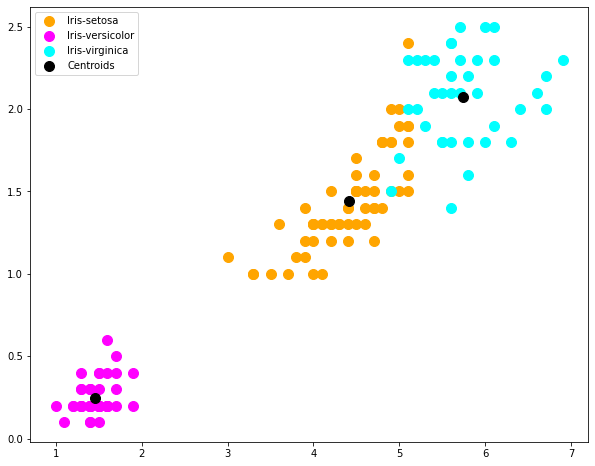

In [ ]:
# Visualising the clusters - On the 3rd and 4th columns
fig = plt.figure(figsize=(10, 8))
plt.scatter(x[ y_kmeans==0,2],x[ y_kmeans==0,3],s=100,c="orange",label="Iris-setosa")
plt.scatter(x[ y_kmeans==1,2],x[ y_kmeans==1,3],s=100,c="magenta",label="Iris-versicolor")
plt.scatter(x[ y_kmeans==2,2],x[ y_kmeans==2,3],s=100,c="cyan",label="Iris-virginica")
# Plotting centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,3],s=100,c="black",label="Centroids")
plt.legend()

**Thus we come to the conclusion that we were able to successfully predict the optimum number of clusters and visualise it using scatter plots.**

# **Thank You!**